In [2]:
!uv pip install torchvision


Using Python 3.10.18 environment at: c:\Users\MS\Desktop\IDEAS\Projekty\CD34\Repozytoria\slide-tiling\.venv
Resolved 12 packages in 1.63s
Prepared 4 packages in 2m 24s
Installed 8 packages in 1m 16s
 + filelock==3.19.1
 + fsspec==2025.9.0
 + jinja2==3.1.6
 + markupsafe==3.0.2
 + mpmath==1.3.0
 + sympy==1.14.0
 + torch==2.8.0
 + torchvision==0.23.0


In [16]:
from torchvision.io import read_image, ImageReadMode
from pathlib import Path
import pandas as pd
from torchvision.ops import box_convert
import torch

img_name = "21_09830A1_19_ROI_0_0_3"
IMG_DIR = r"C:\Users\MS\Desktop\IDEAS\Projekty\CD34\Dane\CD34_tiles_yolo\images_całe_160x160"
yolo_path = Path(r"c:\Users\MS\Desktop\IDEAS\Projekty\CD34\Dane\CD34_tiles_yolo\labels_pełne", f"{img_name}.txt")

path = Path(IMG_DIR, f"{img_name}.jpg")

image = read_image(path, ImageReadMode.RGB)

boxes = torch.tensor(pd.read_csv(yolo_path, sep=" ", header=None).to_numpy()[:,1:]) * 160
boxes = box_convert(boxes, "cxcywh", "xyxy") 

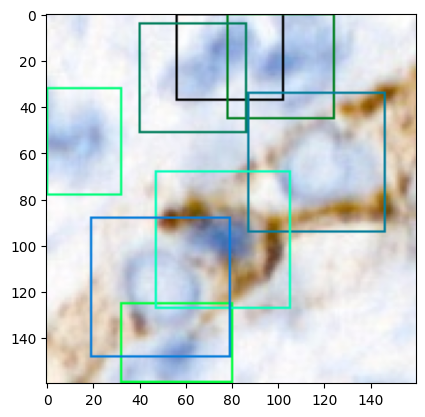

In [17]:
from torchvision.utils import draw_bounding_boxes
image_with_boxes = draw_bounding_boxes(image, boxes)

from matplotlib import pyplot as plt
plt.imshow(image_with_boxes.permute(1, 2, 0))
plt.show()